# Import Necessary Library

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [3]:
book = pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Model Building

In [4]:
from mlxtend.frequent_patterns import apriori,association_rules

In [72]:
freq_items= apriori(book,min_support=0.02,use_colnames=True)
freq_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(ChildBks, ArtBks, CookBks, DoItYBks, RefBks, ..."
272,0.0270,"(ChildBks, CookBks, DoItYBks, RefBks, GeogBks,..."
273,0.0310,"(ArtBks, ChildBks, CookBks, DoItYBks, GeogBks,..."
274,0.0225,"(ArtBks, ChildBks, CookBks, RefBks, GeogBks, Y..."


# Associates with support: 0.02, confidence:60

In [83]:
associates= association_rules(freq_items,metric='confidence',min_threshold=0.6)
associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
295,"(ArtBks, ChildBks, DoItYBks, GeogBks, YouthBks)",(CookBks),0.0335,0.4310,0.0310,0.925373,2.147037,0.016561,7.624600
296,"(ArtBks, CookBks, DoItYBks, GeogBks, YouthBks)",(ChildBks),0.0370,0.4230,0.0310,0.837838,1.980704,0.015349,3.558167
297,"(ChildBks, CookBks, DoItYBks, GeogBks, YouthBks)",(ArtBks),0.0510,0.2410,0.0310,0.607843,2.522171,0.018709,1.935450
298,"(ArtBks, DoItYBks, ChildBks, YouthBks)","(CookBks, GeogBks)",0.0510,0.1925,0.0310,0.607843,3.157627,0.021182,2.059125


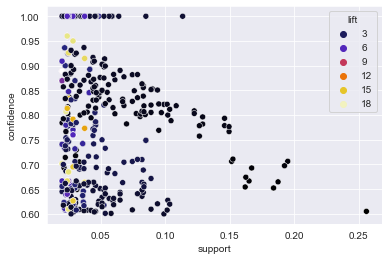

In [65]:
sns.set_style('darkgrid')
sns.scatterplot(data=associates,x = X,y = Y,hue=Z,palette='CMRmap')
plt.show()


In [30]:
X =associates['support']
Y = associates['confidence']

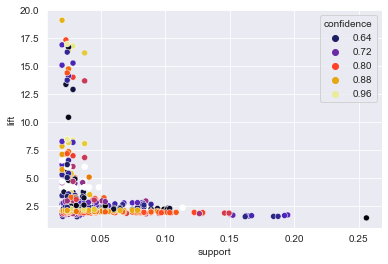

In [66]:
sns.scatterplot(data=associates,x = X,y = Z,color = 'blue',hue = Y,palette='CMRmap')
plt.show()

# Associates with support: 0.03, confidence:70

In [78]:
freq_items= apriori(book,min_support=0.03,use_colnames=True)
freq_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
176,0.0535,"(ArtBks, ChildBks, CookBks, DoItYBks, GeogBks)"
177,0.0405,"(ArtBks, ChildBks, CookBks, RefBks, GeogBks)"
178,0.0300,"(ArtBks, ChildBks, CookBks, GeogBks, ItalCook)"
179,0.0370,"(ArtBks, CookBks, DoItYBks, GeogBks, YouthBks)"


In [79]:
associates= association_rules(freq_items,metric='confidence',min_threshold=0.7)
associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(ItalArt),(ChildBks),0.0485,0.423,0.0360,0.742268,1.754771,0.015484,2.238760
4,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
...,...,...,...,...,...,...,...,...,...
187,"(ArtBks, CookBks, DoItYBks, YouthBks)",(GeogBks),0.0525,0.276,0.0370,0.704762,2.553485,0.022510,2.452258
188,"(ArtBks, GeogBks, DoItYBks, YouthBks)",(CookBks),0.0395,0.431,0.0370,0.936709,2.173338,0.019975,8.990200
189,"(ArtBks, ChildBks, DoItYBks, GeogBks, YouthBks)",(CookBks),0.0335,0.431,0.0310,0.925373,2.147037,0.016561,7.624600
190,"(ArtBks, CookBks, DoItYBks, GeogBks, YouthBks)",(ChildBks),0.0370,0.423,0.0310,0.837838,1.980704,0.015349,3.558167


In [80]:
x =associates['support']
y = associates['confidence']
z = associates['lift']

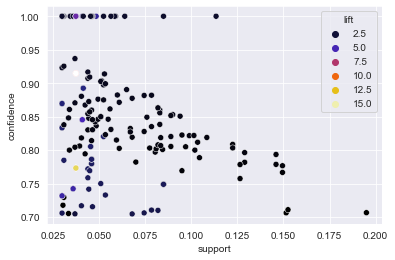

In [81]:
sns.set_style('darkgrid')
sns.scatterplot(data=associates,x = x,y = y,hue=z,palette='CMRmap')
plt.show()


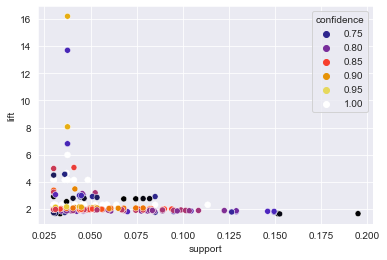

In [82]:
sns.scatterplot(data=associates,x = x,y = z,color = 'blue',hue = y,palette='CMRmap')
plt.show()